In [7]:
!pip install mlxtend

  Obtaining dependency information for mlxtend from https://files.pythonhosted.org/packages/1c/07/512f6a780239ad6ce06ce2aa7b4067583f5ddcfc7703a964a082c706a070/mlxtend-0.23.1-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   -- ------------------------------------- 0.1/1.4 MB 2.3 MB/s eta 0:00:01
   ---- ----------------------------------- 0.2/1.4 MB 1.8 MB/s eta 0:00:01
   ------ --------------------------------- 0.2/1.4 MB 2.0 MB/s eta 0:00:01
   ------- -------------------------------- 0.3/1.4 MB 1.6 MB/s eta 0:00:01
   --------- ------------------------------ 0.3/1.4 MB 1.7 MB/s eta 0:00:01
   ----------- ---------------------------- 0.4/1.4 MB 1.7 MB/s eta 0:00:01
   ------------- -------------------------- 0.5/1.4 MB 1.8 MB/s eta 0:00:01
   --------------- ------------------------ 0.6/1.4 MB 1.9 MB/s eta 0:00:01
   ---------------- ----------------------- 0.6/1.4 MB

DEPRECATION: textract 1.6.5 has a non-standard dependency specifier extract-msg<=0.29.*. pip 23.3 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of textract or contact the author to suggest that they release a version with a conforming dependency specifiers. Discussion can be found at https://github.com/pypa/pip/issues/12063


In [8]:
import pandas as pd
import numpy as np
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

In [9]:
df = pd.read_csv('final_data.csv')
df.drop(['Unnamed: 0.1','Unnamed: 0'], axis=1, inplace=True)
df.head()

,log_price,accommodates,bathrooms,bedrooms,beds,Family/kid friendly,translation missing: en.hosting_amenity_50,Fire extinguisher,Cable TV,Buzzer/wireless intercom,...,cancellation_policy_moderate,cancellation_policy_strict,cancellation_policy_super_strict_30,cancellation_policy_super_strict_60,cleaning_fee_True,city_Chicago,city_DC,city_LA,city_NYC,city_SF
0,5.010635,3,1.0,1.0,1.0,1,1,0,0,0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,5.129899,7,1.0,3.0,3.0,1,1,1,0,0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,4.976734,5,1.0,1.0,3.0,1,1,1,1,1,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,6.620073,4,1.0,2.0,2.0,0,0,1,1,1,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,4.744932,2,1.0,0.0,1.0,0,0,1,0,0,...,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0


In [87]:
frequent_items = apriori(df.drop(['log_price','accommodates','bedrooms','beds','bathrooms','translation missing: en.hosting_amenity_50','translation missing: en.hosting_amenity_49','bed_type_Real Bed','city_Chicago','city_DC','city_LA','city_NYC','city_SF'],axis=1), min_support=0.2, use_colnames=True)

C:\Users\HP\anaconda3\Lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


In [88]:
rules = association_rules(frequent_items, metric='lift',min_threshold = 1)

In [89]:
# Display frequent itemsets
print("Frequent Itemsets:")
print(frequent_items)

Frequent Itemsets:
     support                                           itemsets
0   0.499602                              (Family/kid friendly)
1   0.414567                                (Fire extinguisher)
2   0.327252                                         (Cable TV)
3   0.229831                         (Buzzer/wireless intercom)
4   0.371497                                    (First aid kit)
5   0.318967                         (Free parking on premises)
6   0.242650                             (Lock on bedroom door)
7   0.256575                                 (24-hour check-in)
8   0.222787                              (property_type_House)
9   0.413407                           (room_type_Private room)
10  0.257222                     (cancellation_policy_moderate)
11  0.436831                       (cancellation_policy_strict)
12  0.734075                                (cleaning_fee_True)
13  0.234554           (Family/kid friendly, Fire extinguisher)
14  0.205921         

In [90]:
# Display association rules
print("\nAssociation Rules:")
print(rules)


Association Rules:
                                          antecedents  \
0                               (Family/kid friendly)   
1                                 (Fire extinguisher)   
2                                     (First aid kit)   
3                               (Family/kid friendly)   
4                          (Free parking on premises)   
5                               (Family/kid friendly)   
6                        (cancellation_policy_strict)   
7                               (Family/kid friendly)   
8                                 (cleaning_fee_True)   
9                               (Family/kid friendly)   
10                                    (First aid kit)   
11                                (Fire extinguisher)   
12                                (cleaning_fee_True)   
13                                (Fire extinguisher)   
14                                (cleaning_fee_True)   
15                                         (Cable TV)   
16         

In [91]:
apriori_df = pd.DataFrame(rules)

In [92]:
apriori_df

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(Family/kid friendly),(Fire extinguisher),0.499602,0.414567,0.234554,0.469481,1.132460,0.027435,1.103509,0.233747
1,(Fire extinguisher),(Family/kid friendly),0.414567,0.499602,0.234554,0.565779,1.132460,0.027435,1.152405,0.199795
2,(First aid kit),(Family/kid friendly),0.371497,0.499602,0.205921,0.554300,1.109484,0.020320,1.122725,0.157008
3,(Family/kid friendly),(First aid kit),0.499602,0.371497,0.205921,0.412170,1.109484,0.020320,1.069192,0.197203
4,(Free parking on premises),(Family/kid friendly),0.318967,0.499602,0.200200,0.627649,1.256299,0.040843,1.343889,0.299561
5,(Family/kid friendly),(Free parking on premises),0.499602,0.318967,0.200200,0.400718,1.256299,0.040843,1.136415,0.407697
6,(cancellation_policy_strict),(Family/kid friendly),0.436831,0.499602,0.243270,0.556898,1.114682,0.025028,1.129305,0.182687
7,(Family/kid friendly),(cancellation_policy_strict),0.499602,0.436831,0.243270,0.486928,1.114682,0.025028,1.097641,0.205603
8,(cleaning_fee_True),(Family/kid friendly),0.734075,0.499602,0.397687,0.541753,1.084370,0.030942,1.091984,0.292583
9,(Family/kid friendly),(cleaning_fee_True),0.499602,0.734075,0.397687,0.796008,1.084370,0.030942,1.303609,0.155487


In [100]:
apriori_df.sort_values(by='support',ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
8,(cleaning_fee_True),(Family/kid friendly),0.734075,0.499602,0.397687,0.541753,1.084370,0.030942,1.091984,0.292583
9,(Family/kid friendly),(cleaning_fee_True),0.499602,0.734075,0.397687,0.796008,1.084370,0.030942,1.303609,0.155487
25,(cancellation_policy_strict),(cleaning_fee_True),0.436831,0.734075,0.375153,0.858806,1.169917,0.054487,1.883411,0.257895
24,(cleaning_fee_True),(cancellation_policy_strict),0.734075,0.436831,0.375153,0.511056,1.169917,0.054487,1.151807,0.546163
13,(Fire extinguisher),(cleaning_fee_True),0.414567,0.734075,0.325107,0.784208,1.068294,0.020784,1.232322,0.109199
12,(cleaning_fee_True),(Fire extinguisher),0.734075,0.414567,0.325107,0.442880,1.068294,0.020784,1.050820,0.240400
17,(First aid kit),(cleaning_fee_True),0.371497,0.734075,0.291522,0.784723,1.068997,0.018816,1.235272,0.102694
16,(cleaning_fee_True),(First aid kit),0.734075,0.371497,0.291522,0.397129,1.068997,0.018816,1.042517,0.242712
14,(cleaning_fee_True),(Cable TV),0.734075,0.327252,0.261729,0.356543,1.089504,0.021501,1.045520,0.308926
15,(Cable TV),(cleaning_fee_True),0.327252,0.734075,0.261729,0.799777,1.089504,0.021501,1.328149,0.122113


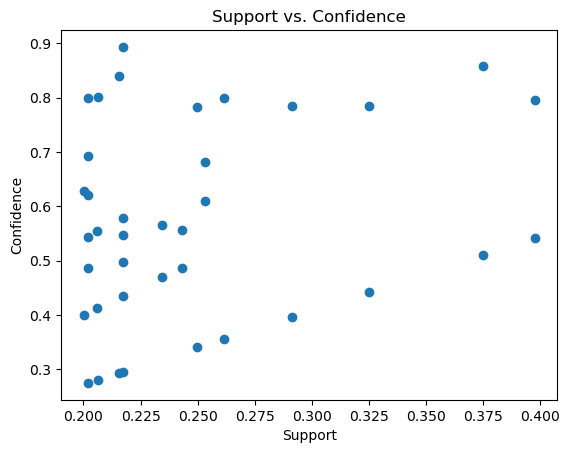

In [93]:
import matplotlib.pyplot as plt

# Plotting support vs. confidence for association rules
plt.scatter(rules['support'], rules['confidence'])
plt.xlabel('Support')
plt.ylabel('Confidence')
plt.title('Support vs. Confidence')
plt.show()

In [94]:
apriori_df[(apriori_df['confidence']>0.7)& (apriori_df['support']>0.7)]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric


In [95]:
apriori_df[(apriori_df['confidence']>0.5)& (apriori_df['support']<0.25)].sort_values(by='confidence',ascending=False)[:10][['antecedents','consequents']]

,antecedents,consequents
28,"(cancellation_policy_strict, Family/kid friendly)",(cleaning_fee_True)
20,(24-hour check-in),(cleaning_fee_True)
22,(cancellation_policy_moderate),(cleaning_fee_True)
34,"(First aid kit, Fire extinguisher)",(cleaning_fee_True)
19,(Free parking on premises),(cleaning_fee_True)
32,"(cleaning_fee_True, First aid kit)",(Fire extinguisher)
4,(Free parking on premises),(Family/kid friendly)
33,"(cleaning_fee_True, Fire extinguisher)",(First aid kit)
27,"(cleaning_fee_True, cancellation_policy_strict)",(Family/kid friendly)
1,(Fire extinguisher),(Family/kid friendly)


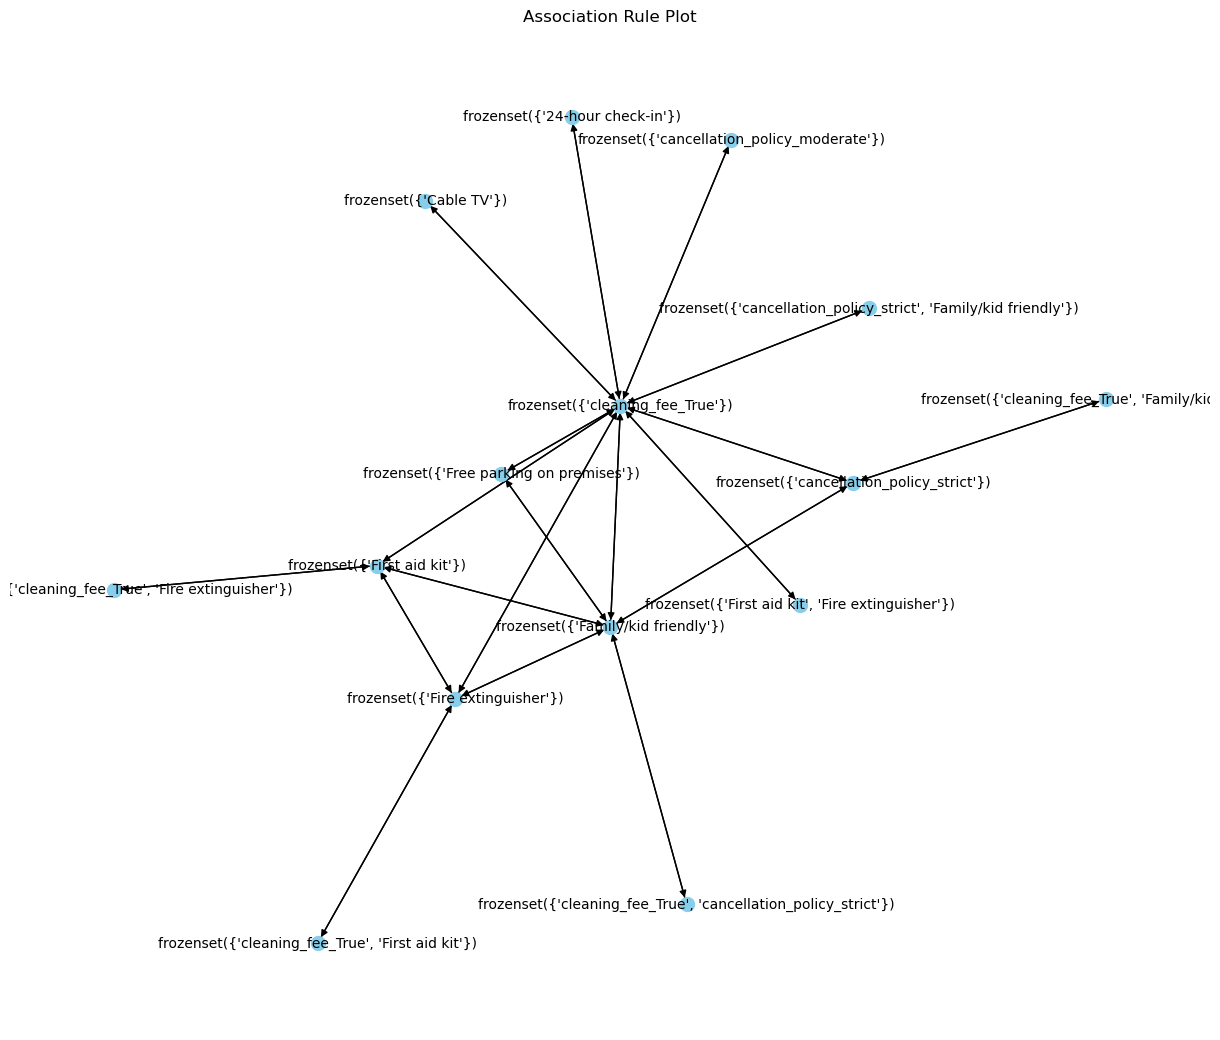

In [99]:
import networkx as nx
import matplotlib.pyplot as plt

# Create a directed graph
G = nx.DiGraph()
# Add nodes and edges for association rules
for rule in range(len(apriori_df)):
    antecedent = apriori_df.iloc[rule]['antecedents']
    consequent = apriori_df.iloc[rule]['consequents']
    support = round(apriori_df.iloc[rule]['support'],2)
    confidence = round(apriori_df.iloc[rule]['confidence'],2)
    
    G.add_edge(antecedent, consequent)
plt.figure(figsize=(12, 10))
# Plot the graph
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_size=100, node_color="skyblue", font_size=10, arrows=True)
edge_labels = nx.get_edge_attributes(G, 'label')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

plt.title("Association Rule Plot")
plt.show()

In [82]:
apriori_df.to_csv('apripri_df.csv')